Code: `yolox-m-infer.ipynb` 
(7 feb: 7 days to go)

___

**Results:**

aug2:

  * Ver 39 (LB=.???): `conf:.15` +  `nmsth:.45` + `reef-yolox-m-aug2-v6(FOLD 3)` + `(1376, 2464)`

  * Ver 37 (LB=.593): `conf:.15` +  `nmsth:.45` + `reef-yolox-m-aug2-v1(FOLD 3)` + `(1376, 2464)`


___

Augmentation: 

  * Ver 38 (LB=.???): `conf:.15` +  `nmsth:.45` + `reef-yolox-m-aug-v1(FOLD 3)` + `(1376, 2464)`

  * ~Ver 36 (LB=.599): `conf:.15` +  `nmsth:.45` + `reef-yolox-m-aug-v9(FOLD 9)` + `(1376, 2464)`~
  
  * ~Ver 35 (LB=.567): `conf:.15` +  `nmsth:.45` + `reef-yolox-m-aug-v8(FOLD 8)` + `(1376, 2464)`~
  
  * ~Ver 33/34 (LB=.614/.613): `conf:.11/.15` +  `nmsth:.55/.55` + `reef-yolox-m-aug-v6(FOLD 6)` + `(864, 1536)/(1376, 2464)`~

  * ~Ver 31/32 (LB=.541/.614): `conf:.05/.11` +  `nmsth:.25/.45` + `reef-yolox-m-aug-v6(FOLD 6)` + `(864, 1536)/(1376, 2464)`~
   
   * **Ver 20/27(LB=.523/.625)**: `conf:.05/.11` +  `nmsth:.25/.45` + `reef-yolox-m-aug-v1(FOLD 3)` + `(864, 1536)/(1376, 2464)`
 
       * Ver 20/23/24/25/26(LB=.523/.607/.610/???/.609) `conf:.05/.05/.08/.11/.15` +  `nmsth:.25` + `reef-yolox-m-aug-v1/` + `(864, 1536)/(1216, 2144)` 
 
No-Augmentation:
   
   * Ver 21(LB=.580): v19 + `nmsth:.35`  
   
   * **Ver 18/19(LB=.477/.580)** `conf:.05 + nmsth:.25` + `reef-yolox-m-v12/` + `(864, 1536)/(1216, 2144)` 
   
   * Ver 13/15/17(LB=.448/.575/.575) `conf:.05 + nmsth:.25` + `reef-yolox-m-v10/` + `(864, 1536)/(1216, 2144)/(1376, 2464)`

   * ~Ver 16(LB=.410) `conf:.05 + nmsth:.25` + `reef-yolox-m-v11/` + `(864, 1536)`~ 

   * ~Ver 14(LB=.???) `conf:.05 + nmsth:.25` + `reef-yolox-m-v10/` + `(864, 1536)`~ 

   * Ver 7(LB=.569): `reef-yolox-m-v0` + `(1024, 1792)` Size x 1.4

   * ~Ver 5(LB=.551): `reef-yolox-m-v0` + `(1216, 2176)` Size x 1.7~

   * ~Ver 6(LB=.559): `reef-yolox-m-v0` + `(1152, 2048)` Size x 1.6~ 

   * ~Ver 4(LB=.565): `reef-yolox-m-v0` + `(1088, 1920)` Size x 1.5~

   * **Ver 2(LB=.431)**:  **(Weight from Ver 1 of training used)**. ema=ON; + `lr=1-3` + `reef-yolox-m-v0/best_ckpt.pth `; `nms` = .25; `conf` = .05

___

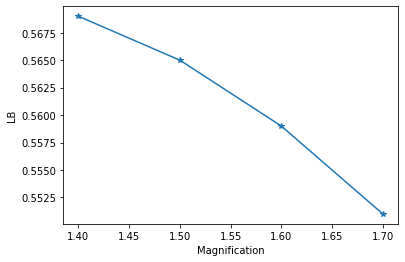

In [1]:
import matplotlib.pyplot as plt

lb = [.569, .565, .559, .551]
size_factor = [1.4, 1.5, 1.6, 1.7 ]
plt.plot(size_factor, lb, '*-')
plt.xlabel('Magnification')
plt.ylabel('LB')
plt.show()

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import torch
import importlib
import cv2 
import pandas as pd

from PIL import Image
from IPython.display import display

In [3]:
# Copy YOLOX and required modules from local repository (Kaggle dataset -> https://www.kaggle.com/remekkinas/yolox-cots-models)
%cp -r /kaggle/input/yolox-cots-models /kaggle/working/
%cd /kaggle/working/yolox-cots-models/yolox-dep

/kaggle/working/yolox-cots-models/yolox-dep


In [4]:
# Install YOLOX required modules

!pip install pip-21.3.1-py3-none-any.whl -f ./ --no-index
!pip install loguru-0.5.3-py3-none-any.whl -f ./ --no-index
!pip install ninja-1.10.2.3-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl -f ./ --no-index
!pip install onnx-1.8.1-cp37-cp37m-manylinux2010_x86_64.whl -f ./ --no-index
!pip install onnxruntime-1.8.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl -f ./ --no-index
!pip install onnxoptimizer-0.2.6-cp37-cp37m-manylinux2014_x86_64.whl -f ./ --no-index
!pip install thop-0.0.31.post2005241907-py3-none-any.whl -f ./ --no-index
!pip install tabulate-0.8.9-py3-none-any.whl -f ./ --no-index
#!pip install onnx-simplifier-0.3.6.tar.gz -f ./ --no-index

Looking in links: ./
Processing ./pip-21.3.1-py3-none-any.whl
pip is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Looking in links: ./
Processing ./loguru-0.5.3-py3-none-any.whl
Looking in links: ./
Processing ./ninja-1.10.2.3-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl
Looking in links: ./
Processing ./onnx-1.8.1-cp37-cp37m-manylinux2010_x86_64.whl
Looking in links: ./
Processing ./onnxruntime-1.8.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Looking in links: ./
Processing ./onnxoptimizer-0.2.6-cp37-cp37m-manylinux2014_x86_64.whl
Looking in links: ./
Processing ./thop-0.0.31.post2005241907-py3-none-any.whl
Looking in links: ./
Processing ./tabulate-0.8.9-py3-none-any.whl
tabulate is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [5]:
# Install YOLOX
%cd /kaggle/working/yolox-cots-models/YOLOX
!pip install -r requirements.txt
!pip install -v -e . 

/kaggle/working/yolox-cots-models/YOLOX
Using pip 21.3.1 from /opt/conda/lib/python3.7/site-packages/pip (python 3.7)
Obtaining file:///kaggle/working/yolox-cots-models/YOLOX
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-wubo773r/yolox.egg-info
  writing /tmp/pip-pip-egg-info-wubo773r/yolox.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-wubo773r/yolox.egg-info/dependency_links.txt
  writing top-level names to /tmp/pip-pip-egg-info-wubo773r/yolox.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-wubo773r/yolox.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-wubo773r/yolox.egg-info/SOURCES.txt'
  adding license file 'LICENSE'
  writing manifest file '/tmp/pip-pip-egg-info-wubo773r/yolox.egg-info/SOURCES.txt'
  Preparing metadata (setup.py) ... done
  Running setup.py develop for yolox
    Running command /opt/conda/bin/python3.7 -c 'import io, os, sys, setuptools, tokenize; sy

In [6]:
# Install CocoAPI tool
%cd /kaggle/working/yolox-cots-models/yolox-dep/cocoapi/PythonAPI

!make
!make install
!python setup.py install

/kaggle/working/yolox-cots-models/yolox-dep/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/opt/conda/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /kaggle/working/yolox-cots-models/yolox-dep/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
gcc -pthread -B /opt/conda/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/opt/conda/lib/python3.7/site-packages/numpy/core/include -I../common -I/opt/conda/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7/../common/maskApi.o -Wno-cpp -Wno-unused-function -

In [7]:
import pycocotools

In [8]:
%cd /kaggle/working/yolox-cots-models/YOLOX

#%cp /kaggle/input/reef-yolox-v0/best_ckpt.pth .

#CHECKPOINT_FILE = '/kaggle/input/reef-yolox-m-v12/best_ckpt.pth'

#CHECKPOINT_FILE = '/kaggle/input/reef-yolox-m-aug-v1/best_ckpt.pth'

CHECKPOINT_FILE = '/kaggle/input/reef-yolox-m-aug2-v6/best_ckpt.pth'


/kaggle/working/yolox-cots-models/YOLOX


In [9]:
config_file_template = '''

#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Copyright (c) Megvii, Inc. and its affiliates.

import os

from yolox.exp import Exp as MyExp


class Exp(MyExp):
    def __init__(self):
        super(Exp, self).__init__()
        self.depth = 0.67
        self.width = 0.75
        self.exp_name = os.path.split(os.path.realpath(__file__))[1].split(".")[0]
        self.num_classes = 1

'''

with open('cots_config.py', 'w') as f:
    f.write(config_file_template)

In [10]:
from yolox.utils import postprocess
from yolox.data.data_augment import ValTransform

COCO_CLASSES = (
  "starfish",
)

# get YOLOX experiment
exp_file = 'cots_config.py'

current_exp = importlib.import_module(os.path.basename(exp_file).split(".")[0])
#current_exp = importlib.import_module('cots_config')
exp = current_exp.Exp()

# set inference parameters

#test_size = (864, 1536) # x1.2
#test_size = (1216, 2144) # x1.4

test_size = (1376, 2464) # x1.6

num_classes = 1

confthre = 0.11 # Confidence Threshold
nmsthre = 0.45 # IOU Threshold


# get YOLOX model
model = exp.get_model()
model.cuda()
model.eval()

# get custom trained checkpoint
ckpt_file = CHECKPOINT_FILE
ckpt = torch.load(ckpt_file, map_location="cpu")
model.load_state_dict(ckpt["model"])

<All keys matched successfully>

In [11]:
def yolox_inference(img, model, test_size): 
    bboxes = []
    bbclasses = []
    scores = []
    
    preproc = ValTransform(legacy = False)

    tensor_img, _ = preproc(img, None, test_size)
    tensor_img = torch.from_numpy(tensor_img).unsqueeze(0)
    tensor_img = tensor_img.float()
    tensor_img = tensor_img.cuda()

    with torch.no_grad():
        outputs = model(tensor_img)
        '''postprocess(): yolox/utils/boxes.py'''
        outputs = postprocess(
                    outputs, num_classes, confthre,
                    nmsthre, class_agnostic=True
                )

    if outputs[0] is None:
        return [], [], []
    
    outputs = outputs[0].cpu()
    bboxes = outputs[:, 0:4]

    bboxes /= min(test_size[0] / img.shape[0], test_size[1] / img.shape[1])
    bbclasses = outputs[:, 6]
    scores = outputs[:, 4] * outputs[:, 5]
    
    return bboxes, bbclasses, scores

## SUBMIT PREDICTION TO COMPETITION

In [12]:
%cd /kaggle/working/

/kaggle/working


In [13]:
import greatbarrierreef

env = greatbarrierreef.make_env()   # initialize the environment
iter_test = env.iter_test()  

In [14]:
submission_dict = {
    'id': [],
    'prediction_string': [],
}

for (image_np, sample_prediction_df) in iter_test:
 
    bboxes, bbclasses, scores = yolox_inference(image_np[:,:,::-1], model, test_size)
    
    predictions = []
    for i in range(len(bboxes)):
        box = bboxes[i]
        cls_id = int(bbclasses[i])
        score = scores[i]
        if score < confthre:
            continue
        x_min = int(box[0])
        y_min = int(box[1])
        x_max = int(box[2])
        y_max = int(box[3])
        
        bbox_width = x_max - x_min
        bbox_height = y_max - y_min
        
        predictions.append('{:.2f} {} {} {} {}'.format(score, x_min, y_min, bbox_width, bbox_height))
    
    prediction_str = ' '.join(predictions)
    sample_prediction_df['annotations'] = prediction_str
    env.predict(sample_prediction_df)

    print('Prediction:', prediction_str)

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
Prediction: 
Prediction: 
Prediction: 


In [15]:
sub_df = pd.read_csv('submission.csv')
sub_df.head()

,index,annotations
0,0,NaN
1,1,NaN
2,2,NaN
